# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
telco = pd.read_csv('telco.csv')
print(telco.shape)

(7043, 21)


In [3]:
print(telco.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
print(telco.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
print(telco.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
# Convert SeniorCitizen from int to object
telco['SeniorCitizen'] = telco['SeniorCitizen'].astype('object')
#Convert TotalCharges to float64
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce') # if error, set to NaN
print(telco.dtypes)


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [7]:
# Check for NaN values
print(telco.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
#Drop rows with NaN values
telco = telco.dropna()

In [9]:
# Seperate the identifier and target variable names as lists
custid = ['customerID']
target = ['Churn']

In [10]:
# Seperate categorical and numeric column names as lists
categorical = telco.nunique()[telco.nunique() <10].keys().tolist()
categorical.remove(target[0])

numerical = [col for col in telco.columns if col not in custid+target+categorical]

In [11]:
print("Categorical variables:", categorical)
print("Numerical variables:", numerical)

Categorical variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical variables: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
# One-hot encoding categorical variables
telco_enc = pd.get_dummies(data=telco, columns=categorical, drop_first=True)

In [13]:
print(telco_enc.columns)

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [14]:
print(telco_enc.head(5))

   customerID  tenure  MonthlyCharges  TotalCharges Churn  gender_Male  \
0  7590-VHVEG       1           29.85         29.85    No        False   
1  5575-GNVDE      34           56.95       1889.50    No         True   
2  3668-QPYBK       2           53.85        108.15   Yes         True   
3  7795-CFOCW      45           42.30       1840.75    No         True   
4  9237-HQITU       2           70.70        151.65   Yes        False   

   SeniorCitizen_1  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0            False         True           False             False  ...   
1            False        False           False              True  ...   
2            False        False           False              True  ...   
3            False        False           False             False  ...   
4            False        False           False              True  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False            False   


**Scaling numerical features**

In [15]:
# Import StandardScaler library
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to numerical columns
scaled_numerical = scaler.fit_transform(telco_enc[numerical])

In [16]:
# Build a DataFrame 
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

In [17]:
print(scaled_numerical.head(5))

     tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457


In [18]:
print(scaled_numerical.describe())

             tenure  MonthlyCharges  TotalCharges
count  7.032000e+03    7.032000e+03  7.032000e+03
mean  -1.126643e-16    6.062651e-17 -1.119064e-16
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.280248e+00   -1.547283e+00 -9.990692e-01
25%   -9.542963e-01   -9.709769e-01 -8.302488e-01
50%   -1.394171e-01    1.845440e-01 -3.908151e-01
75%    9.199259e-01    8.331482e-01  6.668271e-01
max    1.612573e+00    1.793381e+00  2.824261e+00


In [19]:
# Merge to the original DataFrame
# Drop non-scaled numerical columns
telco_enc = telco_enc.drop(columns=numerical)

In [20]:
# Merge the non-numerical with the scaled numercical columns
telco_final = telco_enc.merge(right=scaled_numerical,
                              how='left',
                              left_index=True,
                              right_index=True)

In [21]:
print(telco_final.columns)

Index(['customerID', 'Churn', 'gender_Male', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [22]:
print(telco_final.head(5))

   customerID Churn  gender_Male  SeniorCitizen_1  Partner_Yes  \
0  7590-VHVEG    No        False            False         True   
1  5575-GNVDE    No         True            False        False   
2  3668-QPYBK   Yes         True            False        False   
3  7795-CFOCW    No         True            False        False   
4  9237-HQITU   Yes        False            False        False   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0           False             False                            True   
1           False              True                           False   
2           False              True                           False   
3           False             False                            True   
4           False              True                           False   

   MultipleLines_Yes  InternetService_Fiber optic  ...  StreamingMovies_Yes  \
0              False                        False  ...                False   
1              Fal

In [23]:
#Value counts of target variable
print(telco_final['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


# Train Split Dataset

In [24]:
#Drop column customerID
telco_final = telco_final.drop(columns=custid)

In [25]:
# Create X and y
X = telco_final.drop(columns=target)
y = telco_final[target]
print(X.shape, y.shape)

(7032, 30) (7032, 1)


In [33]:
X = X.dropna()
y = y.loc[X.index]

In [34]:
print(X.shape, y.shape)

(7021, 30) (7021, 1)


In [35]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Predict Churn with Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X=X_train, y=y_train)

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

** Evaluate the models **

Key metrics:
- Accuracy - The % of correctly predicted lables (both Churn and non Churn)
- Precision - The % of total model's positive class predictions (Churn) that were correctly classified
- Recall - The % of total positive class samples (all churned customers) that were correctly classified

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 

# Accuracy metrics
pred_train_Y = logreg.predict(X_train)
pred_test_Y = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, pred_train_Y)
test_accuracy = accuracy_score(y_test, pred_test_Y)

print("Training accuracy:", round(train_accuracy,4))
print("Testing accuracy:", round(test_accuracy,4))

Training accuracy: 0.7949
Testing accuracy: 0.7817


In [39]:
print(y_train)
print(pred_train_Y)

     Churn
3430    No
6277   Yes
1547   Yes
412     No
594     No
...    ...
1674    No
2457    No
3500    No
5954    No
6140    No

[4914 rows x 1 columns]
['No' 'No' 'No' ... 'No' 'No' 'No']


In [40]:
print(y_train.dtypes)

Churn    object
dtype: object


In [41]:
print(pred_train_Y.dtypes)

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [42]:
print(np.unique(y_train ))

['No' 'Yes']


In [43]:
print(np.unique(pred_train_Y))

['No' 'Yes']


In [44]:
# Measure precision and recall
train_precision = precision_score(y_train, pred_train_Y, pos_label='Yes') # pos_label='Yes' because value in y_train and pred_train_y is 'Yes' and 'No', remove if 1 and 0
test_precision = precision_score(y_test, pred_test_Y, pos_label='Yes')
train_recall = recall_score(y_train, pred_train_Y, pos_label='Yes')
test_recall = recall_score(y_test, pred_test_Y, pos_label='Yes')
print("Training precision:", round(train_precision,4))
print("Testing precision:", round(test_precision,4))
print("Training recall:", round(train_recall,4))
print("Testing recall:", round(test_recall,4))

Training precision: 0.6369
Testing precision: 0.605
Training recall: 0.5306
Testing recall: 0.5143


In [45]:
# L1 regularization and feature selection
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1) # C parameter needs to be tuned to find the optimal value
logreg.fit(X=X_train, y=y_train)

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [46]:
# Tuning regularization
C = [1, .5, .25, .1, .05, .025, .01, .005, .0025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C
for index in range(0, len(C)):
    logreg = LogisticRegression(penalty='l1', solver='liblinear', C=C[index])
    logreg.fit(X=X_train, y=y_train)
    pred_test_Y = logreg.predict(X_test)
    l1_metrics[index, 1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index, 2] = accuracy_score(y_test, pred_test_Y)
    l1_metrics[index, 3] = precision_score(y_test, pred_test_Y, pos_label='Yes')
    l1_metrics[index, 4] = recall_score(y_test, pred_test_Y, pos_label='Yes')
col_names = ['C', 'Non-zero Coefs', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(l1_metrics, columns=col_names))

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y 

        C  Non-zero Coefs  Accuracy  Precision    Recall
0  1.0000            29.0  0.781206   0.603774  0.514286
1  0.5000            28.0  0.780256   0.602105  0.510714
2  0.2500            27.0  0.778358   0.599147  0.501786
3  0.1000            23.0  0.774561   0.591793  0.489286
4  0.0500            23.0  0.779307   0.607710  0.478571
5  0.0250            15.0  0.773612   0.607235  0.419643
6  0.0100             9.0  0.764594   0.663265  0.232143
7  0.0050             7.0  0.734219   0.000000  0.000000
8  0.0025             0.0  0.734219   0.000000  0.000000


/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1

Optimal C value is 0.025

# Predict churn with Decision Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dtc = DecisionTreeClassifier()

# Fit the model with data
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [48]:
# Measure accuracy
pred_train_Y = dtc.predict(X_train)
pred_test_Y = dtc.predict(X_test)
train_accuracy = accuracy_score(y_train, pred_train_Y)
test_accuracy = accuracy_score(y_test, pred_test_Y)
print("Training accuracy:", round(train_accuracy,4))
print("Testing accuracy:", round(test_accuracy,4))

Training accuracy: 1.0
Testing accuracy: 0.7053


In [49]:
# Measure precision and recall
train_precision = precision_score(y_train, pred_train_Y, pos_label='Yes')
test_precision = precision_score(y_test, pred_test_Y, pos_label='Yes')
train_recall = recall_score(y_train, pred_train_Y, pos_label='Yes')
test_recall = recall_score(y_test, pred_test_Y, pos_label='Yes')
print("Training precision:", round(train_precision,4))
print("Testing precision:", round(test_precision,4))
print("Training recall:", round(train_recall,4))
print("Testing recall:", round(test_recall,4))

Training precision: 1.0
Testing precision: 0.4466
Training recall: 1.0
Testing recall: 0.4554


In [50]:
# Tree depth parameter tuning
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list), 4))
depth_tuning[:,0] = depth_list

for index in range(len(depth_list)):
    dtc = DecisionTreeClassifier(max_depth=depth_list[index])
    dtc.fit(X=X_train, y=y_train)
    pred_test_Y = dtc.predict(X_test)
    depth_tuning[index, 1] = accuracy_score(y_test, pred_test_Y)
    depth_tuning[index, 2] = precision_score(y_test, pred_test_Y, pos_label='Yes')
    depth_tuning[index, 3] = recall_score(y_test, pred_test_Y, pos_label='Yes')
col_names = ['Max Depth', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))


/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


    Max Depth  Accuracy  Precision    Recall
0         2.0  0.734219   0.000000  0.000000
1         3.0  0.754153   0.532308  0.617857
2         4.0  0.766493   0.562044  0.550000
3         5.0  0.772188   0.618343  0.373214
4         6.0  0.758899   0.567358  0.391071
5         7.0  0.747983   0.534442  0.401786
6         8.0  0.733745   0.499203  0.558929
7         9.0  0.735643   0.502970  0.453571
8        10.0  0.727575   0.487973  0.507143
9        11.0  0.732795   0.497418  0.516071
10       12.0  0.719506   0.472566  0.476786
11       13.0  0.719032   0.472222  0.485714
12       14.0  0.709065   0.456486  0.496429


The optimal depth is 5

## Identify and interpret churn drivers

In [55]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


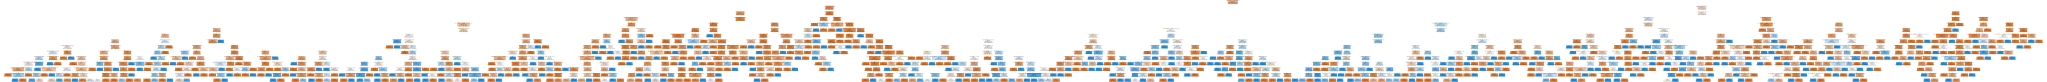

In [56]:
# Plotting decision tree rules
from sklearn import tree 
import graphviz

exported = tree.export_graphviz(
                decision_tree=dtc,
                out_file=None,
                feature_names=X.columns,
                precision=1,
                class_names=['No (Not Churn)','Yes (Churn)'],
                filled=True)

graph = graphviz.Source(exported)
display(graph)

In [57]:
#export image to saved
graph.render(filename='decision_tree_churn_prediction', format='png', cleanup=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.567453 to fit


'decision_tree_churn_prediction.png'

Logistic regression coefficients

In [58]:
logreg.coef_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

In [61]:
coefficients.columns = ['Feature', 'Coefficient']
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])
coefficients = coefficients[coefficients['Coefficient']!=0]
print(coefficients.sort_values(by='Exp_Coefficient'))

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

Note:
- I will review again the section 'Identify and interpret churn drivers'